In this file, I create a Multi-Layer Perceptron model to classify songs into 10 genres. I also explore a variety of pre-trained models. The purpose is to learn and practice building and training models and working with data. The next step in this project would be to create a program to extract the features given in the GTZAN dataset from audio files (mp3/4 or wav). I will likely write this in the future, but the goal of this project is more about the machine learning, modelling component rather than the (admittedly very important) data manipulation part. After that, I would apply the model on a larger scale, and use it to classify real-life data. 

In [ ]:
import sys
assert sys.version_info >= (3, 5) # python>=3.5
import sklearn
assert sklearn.__version__ >= "0.20" # sklearn >= 0.20

# data organization, plotting methods
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# create identical outputs
np.random.seed(36)

# machine learning tools
import pandas as pd
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

The features_3_sec.csv file contains around 1000 songs in each of 10 genres. It contains 58 features, represented numerically. Some of these features contain information encompassing the whole song, represented mostly thorough means and variances. This dataset also splits of 30 second audio clips into three second snippets, taking means and variances of these clips as other features. 

In [ ]:
music = pd.read_csv('features_3_sec.csv')
music.shape

(9990, 60)

In [ ]:
music.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [ ]:
music = music.drop(labels="filename",axis=1) # drop filename
music = music.drop(labels="length",axis=1) # drop length (all the same)

In [ ]:
assert (len(list(music.columns[music.isnull().any()])) == 0) # check for null values, there are none

In [ ]:
music['label'].value_counts() # around 1000 each genre

blues        1000
jazz         1000
metal        1000
pop          1000
reggae       1000
disco         999
classical     998
hiphop        998
rock          998
country       997
Name: label, dtype: int64

In [ ]:
# change genres to ints
labelencoder = LabelEncoder()
music['label'] = labelencoder.fit_transform(music['label'])

array([[<Axes: title={'center': 'chroma_stft_mean'}>,
        <Axes: title={'center': 'chroma_stft_var'}>,
        <Axes: title={'center': 'rms_mean'}>,
        <Axes: title={'center': 'rms_var'}>,
        <Axes: title={'center': 'spectral_centroid_mean'}>],
       [<Axes: title={'center': 'spectral_centroid_var'}>,
        <Axes: title={'center': 'spectral_bandwidth_mean'}>,
        <Axes: title={'center': 'spectral_bandwidth_var'}>,
        <Axes: title={'center': 'rolloff_mean'}>,
        <Axes: title={'center': 'rolloff_var'}>],
       [<Axes: title={'center': 'zero_crossing_rate_mean'}>,
        <Axes: title={'center': 'zero_crossing_rate_var'}>,
        <Axes: title={'center': 'harmony_mean'}>,
        <Axes: title={'center': 'harmony_var'}>,
        <Axes: title={'center': 'perceptr_mean'}>],
       [<Axes: title={'center': 'perceptr_var'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'mfcc1_mean'}>,
        <Axes: title={'center': 'mfcc1_var'}>,
 

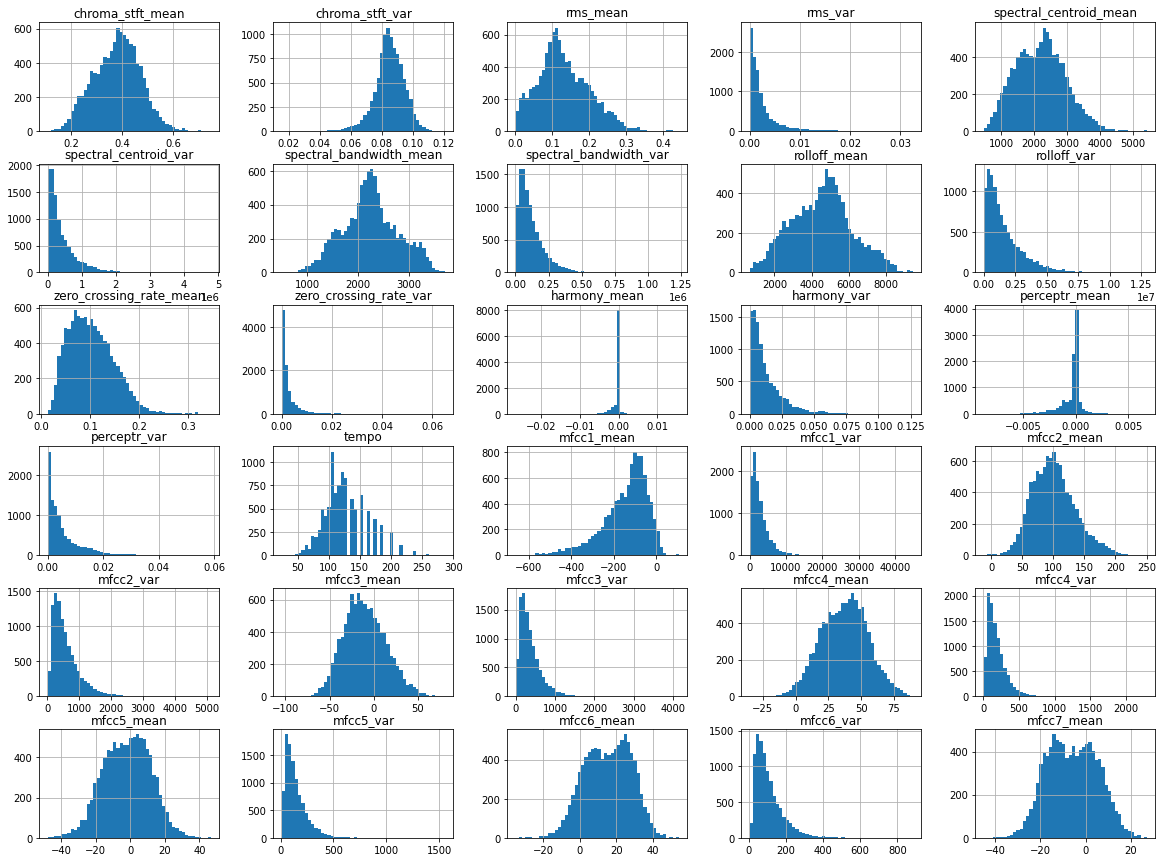

In [ ]:
# histograms for first 30 features
music.iloc[:, :30].hist(bins = 50, figsize=(20,15))

array([[<Axes: title={'center': 'mfcc8_mean'}>,
        <Axes: title={'center': 'mfcc8_var'}>,
        <Axes: title={'center': 'mfcc9_mean'}>,
        <Axes: title={'center': 'mfcc9_var'}>,
        <Axes: title={'center': 'mfcc10_mean'}>],
       [<Axes: title={'center': 'mfcc10_var'}>,
        <Axes: title={'center': 'mfcc11_mean'}>,
        <Axes: title={'center': 'mfcc11_var'}>,
        <Axes: title={'center': 'mfcc12_mean'}>,
        <Axes: title={'center': 'mfcc12_var'}>],
       [<Axes: title={'center': 'mfcc13_mean'}>,
        <Axes: title={'center': 'mfcc13_var'}>,
        <Axes: title={'center': 'mfcc14_mean'}>,
        <Axes: title={'center': 'mfcc14_var'}>,
        <Axes: title={'center': 'mfcc15_mean'}>],
       [<Axes: title={'center': 'mfcc15_var'}>,
        <Axes: title={'center': 'mfcc16_mean'}>,
        <Axes: title={'center': 'mfcc16_var'}>,
        <Axes: title={'center': 'mfcc17_mean'}>,
        <Axes: title={'center': 'mfcc17_var'}>],
       [<Axes: title={'center'

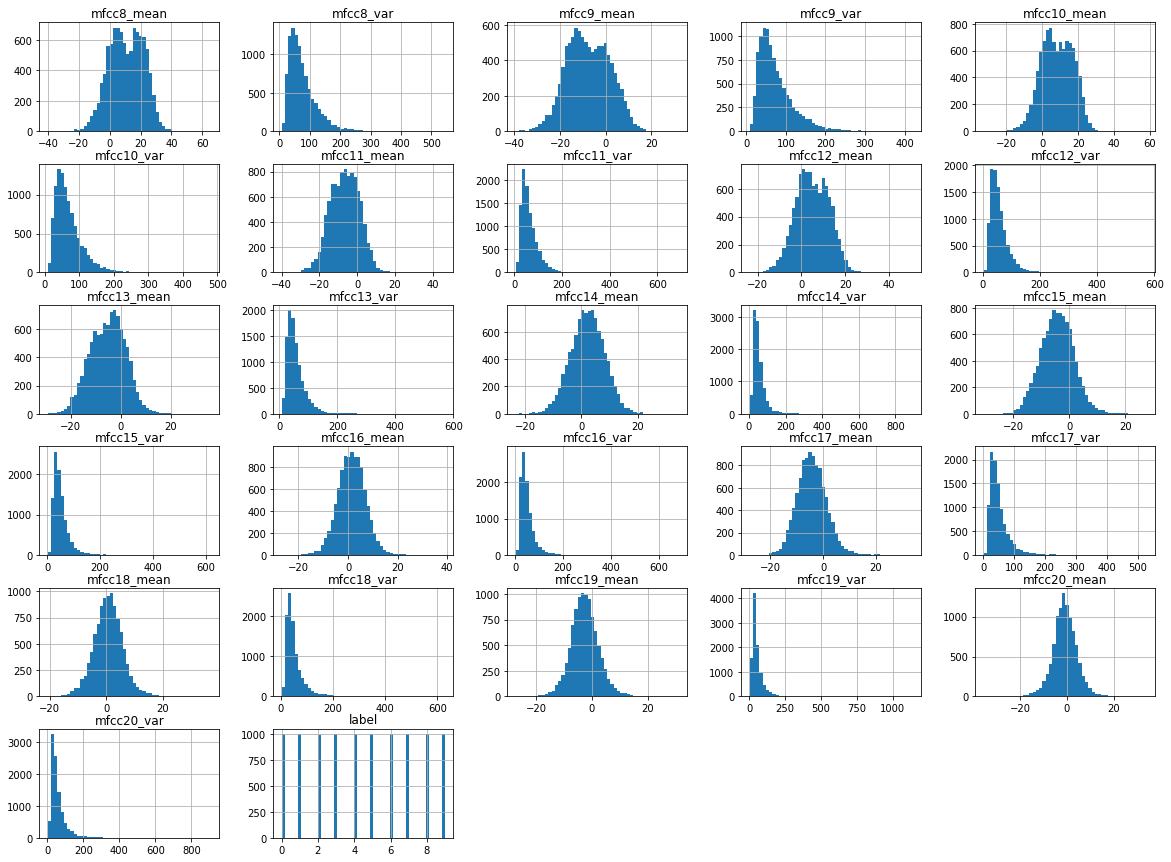

In [ ]:
# histograms for remaining features
music.iloc[:, 31:].hist(bins = 50, figsize=(20,15))

This info does not tell us much about the dataset. The means are unimodel, generally centered around 0. The variances, which cannot be negative, are skewed right, with modes generally close to 0. These histograms tell us that there are no features that need to be removed besides label. (length, which has already been removed, for example would have a histogram with one bar, as every song has the same value)

<Axes: >

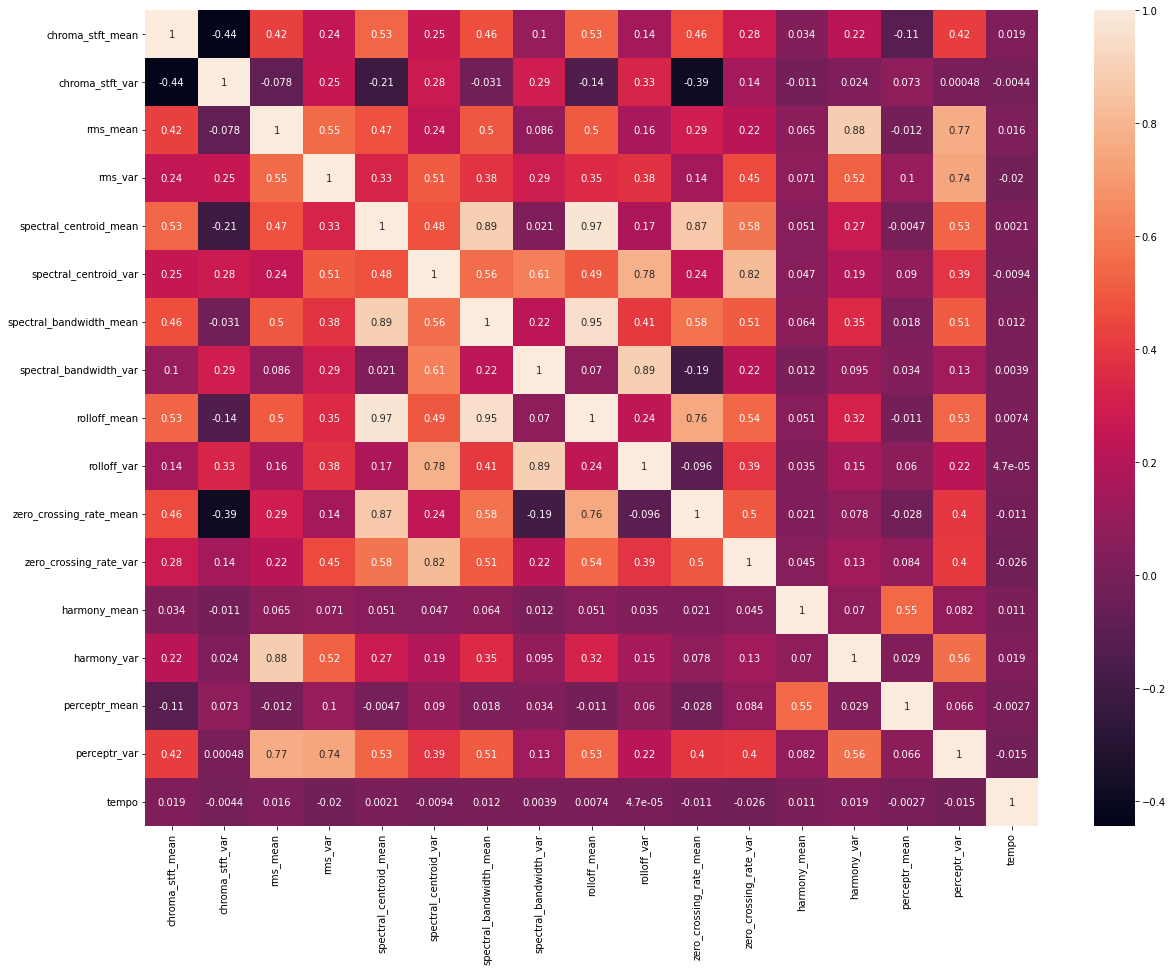

In [ ]:
import seaborn as sns

# heatmap showing the correlations between features: whole-song features
corr_matrix = music.iloc[:,:17].corr()
plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, 
            yticklabels=corr_matrix.columns, annot=True)

<Axes: >

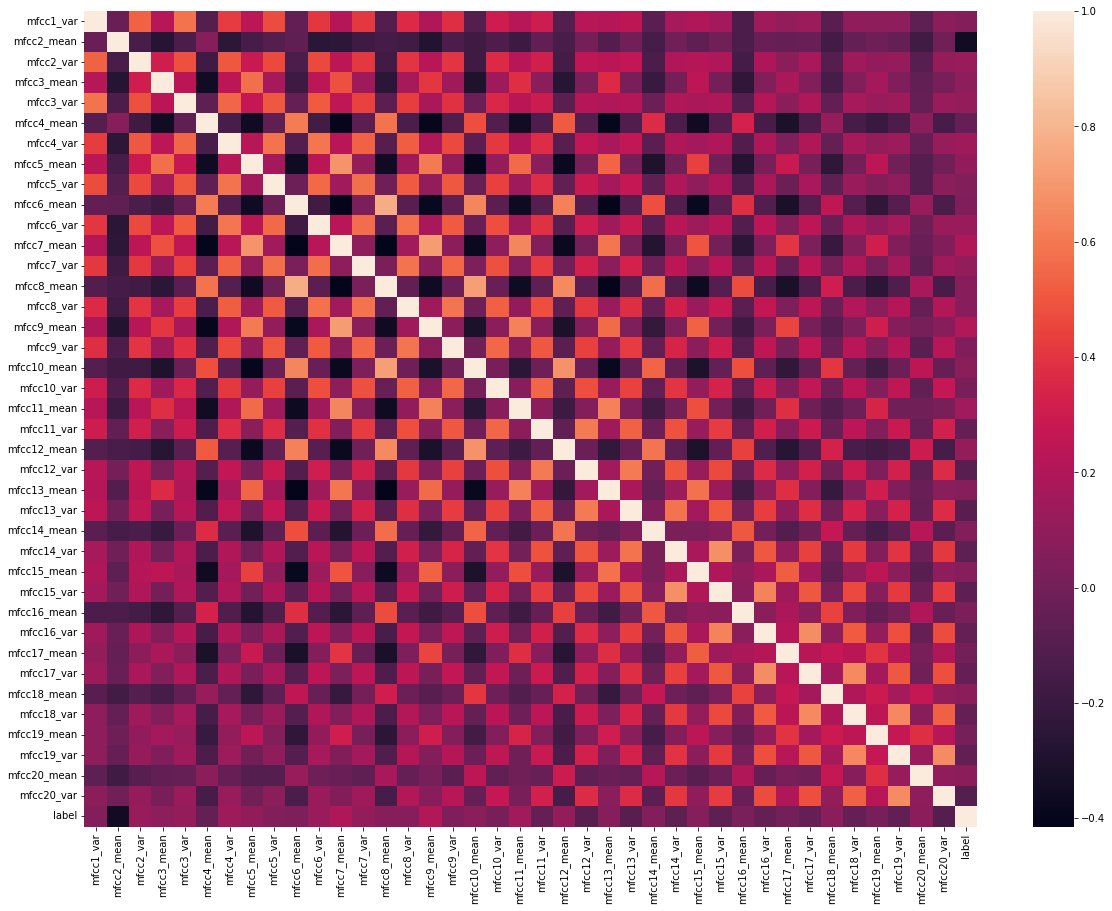

In [ ]:
# heatmap showing the correlations between features: intervals
corr_matrix = music.iloc[:,18:].corr()
plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, 
            yticklabels=corr_matrix.columns, annot=False)

Means that are two intervals away from each other have high correlations, while means one interval away have high negative correlations. Generally, the farther away features are in the song, the closer the correlation is to zero.

In [ ]:
# drop labels
labels = music['label']
music = music.drop('label', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

# splitting data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(music, labels, train_size = 0.8)

In [ ]:
from sklearn.preprocessing import StandardScaler

# scale features
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)


In [ ]:
# Helper Function for Plotting: NOT MY CODE

def plot_history(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    test_acc = history.history['val_accuracy']
    epochs = range(len(train_loss))

    # plot loss
    plt.clf()
    fig = plt.figure()
    plt.plot(train_loss, label='train_loss')
    plt.plot(test_loss, label='test_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.xticks(epochs)
    plt.legend(loc='best')
    plt.title('Training and Testing Loss')
    # plt.savefig("loss.png")
    plt.show()

    # plot acc
    plt.clf()
    fig = plt.figure()
    plt.plot(train_acc, label='train_acc')
    plt.plot(test_acc, label='test_acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.xticks(epochs)
    plt.legend(loc='best')
    plt.title('Training and Testing Accuracy')
    # plt.savefig("acc.png")
    plt.show()

In [ ]:

def trainModel(model,epochs,optimizer):
    batch_size = 32 # pretty standard batch size for the size of the dataset
    # sparse categorical cross-entropy is good for > 2 class classification
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics='accuracy')
    return model.fit(X_train, y_train, validation_data=(X_test, y_test) , epochs=epochs, batch_size=batch_size)


In [ ]:
from tensorflow.keras.models import Sequential

import tensorflow as tensorflow

# basic MLP model

model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(512,activation='relu',input_shape=(X_train.shape[1],)),
    tensorflow.keras.layers.Dropout(0.2),
    
    tensorflow.keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.2),
    
    tensorflow.keras.layers.Dense(128,activation='relu'),
    tensorflow.keras.layers.Dropout(0.2),
    
    tensorflow.keras.layers.Dense(64,activation='relu'),
    tensorflow.keras.layers.Dropout(0.2),
    
    tensorflow.keras.layers.Dense(10,activation='softmax'),
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               29696     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [ ]:
model1 = trainModel(model=model, epochs=100, optimizer='adam') # with adam's default 0.001 learning rate
# only 100 epochs for now: this is not our final model

Epoch 1/100
250/250 [==============================] - 7s 5ms/step - loss: 1.3790 - accuracy: 0.5089 - val_loss: 0.9171 - val_accuracy: 0.6902
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.9275 - accuracy: 0.6914 - val_loss: 0.7150 - val_accuracy: 0.7603
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.7649 - accuracy: 0.7416 - val_loss: 0.6282 - val_accuracy: 0.7828
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.6357 - accuracy: 0.7888 - val_loss: 0.5719 - val_accuracy: 0.7928
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5508 - accuracy: 0.8173 - val_loss: 0.4850 - val_accuracy: 0.8373
Epoch 6/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4754 - accuracy: 0.8385 - val_loss: 0.4743 - val_accuracy: 0.8393
Epoch 7/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4272 - accuracy: 0.8595 - val_loss: 0.5038 - val_accuracy: 0.8308

<Figure size 432x288 with 0 Axes>

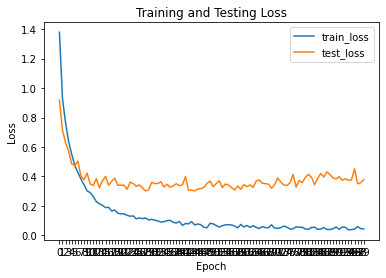

<Figure size 432x288 with 0 Axes>

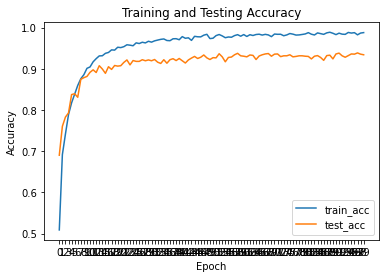

In [ ]:
plot_history(model1)

We achieved 0.93 test accuracy, which is a good start, but this model stagnated after around 30 epochs, and can likely be improved.

In [ ]:
from sklearn.metrics import classification_report

# predictions of testing data classifications
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob)

# actual testing data labels
one_hot_y = np.zeros((y_test.to_numpy().size, y_test.to_numpy().max() + 1))
one_hot_y[np.arange(y_test.to_numpy().size), y_test.to_numpy()] = 1

# prints results by genres
print(classification_report(one_hot_y, y_pred))

63/63 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       196
           1       0.94      1.00      0.97       207
           2       0.94      0.85      0.89       181
           3       0.94      0.92      0.93       199
           4       0.95      0.95      0.95       211
           5       0.91      0.95      0.93       191
           6       0.95      0.99      0.97       203
           7       0.96      0.90      0.93       195
           8       0.90      0.90      0.90       214
           9       0.93      0.90      0.92       201

   micro avg       0.94      0.93      0.93      1998
   macro avg       0.94      0.93      0.93      1998
weighted avg       0.94      0.93      0.93      1998
 samples avg       0.93      0.93      0.93      1998



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


No significant differences by genre. This model is least accurate for rock (8) and metal (2).

Due to the overfitting over the first model, I increased the droupout used after each layer to 0.5. This should result in a model that learns slower, but is less reliant on the training data and thus less prone to overfitting.

In [ ]:
# MLP model, higher dropout

model2_func = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(512,activation='relu',input_shape=(X_train.shape[1],)),
    tensorflow.keras.layers.Dropout(0.5),
    
    tensorflow.keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.5),
    
    tensorflow.keras.layers.Dense(128,activation='relu'),
    tensorflow.keras.layers.Dropout(0.5),
    
    tensorflow.keras.layers.Dense(64,activation='relu'),
    tensorflow.keras.layers.Dropout(0.5),
    
    tensorflow.keras.layers.Dense(10,activation='softmax'),
])

print(model2_func.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 512)               29696     
                                                                 
 dropout_27 (Dropout)        (None, 512)               0         
                                                                 
 dense_38 (Dense)            (None, 256)               131328    
                                                                 
 dropout_28 (Dropout)        (None, 256)               0         
                                                                 
 dense_39 (Dense)            (None, 128)               32896     
                                                                 
 dropout_29 (Dropout)        (None, 128)               0         
                                                                 
 dense_40 (Dense)            (None, 64)               

In [ ]:
model2 = trainModel(model=model2_func, epochs=500, optimizer='adam') # with adam's default 0.001 learning rate

Epoch 1/500
250/250 [==============================] - 3s 5ms/step - loss: 1.9862 - accuracy: 0.2739 - val_loss: 1.4616 - val_accuracy: 0.4865
Epoch 2/500
250/250 [==============================] - 1s 6ms/step - loss: 1.5663 - accuracy: 0.4358 - val_loss: 1.1894 - val_accuracy: 0.6151
Epoch 3/500
250/250 [==============================] - 2s 6ms/step - loss: 1.3609 - accuracy: 0.5246 - val_loss: 1.0236 - val_accuracy: 0.6772
Epoch 4/500
250/250 [==============================] - 1s 4ms/step - loss: 1.2471 - accuracy: 0.5815 - val_loss: 0.9421 - val_accuracy: 0.7032
Epoch 5/500
250/250 [==============================] - 1s 4ms/step - loss: 1.1385 - accuracy: 0.6196 - val_loss: 0.8651 - val_accuracy: 0.7117
Epoch 6/500
250/250 [==============================] - 1s 4ms/step - loss: 1.0650 - accuracy: 0.6569 - val_loss: 0.7959 - val_accuracy: 0.7352
Epoch 7/500
250/250 [==============================] - 1s 4ms/step - loss: 1.0001 - accuracy: 0.6725 - val_loss: 0.7451 - val_accuracy: 0.7598

<Figure size 640x480 with 0 Axes>

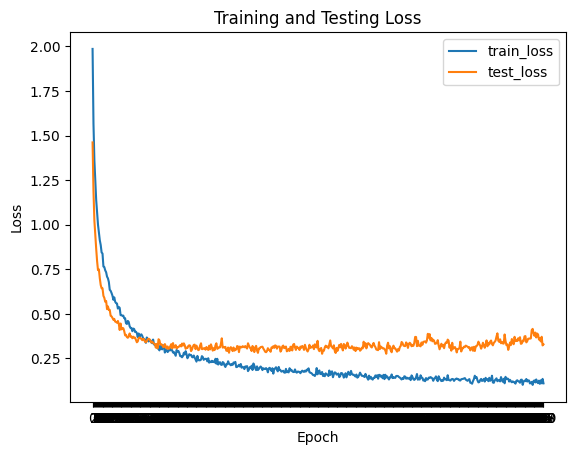

<Figure size 640x480 with 0 Axes>

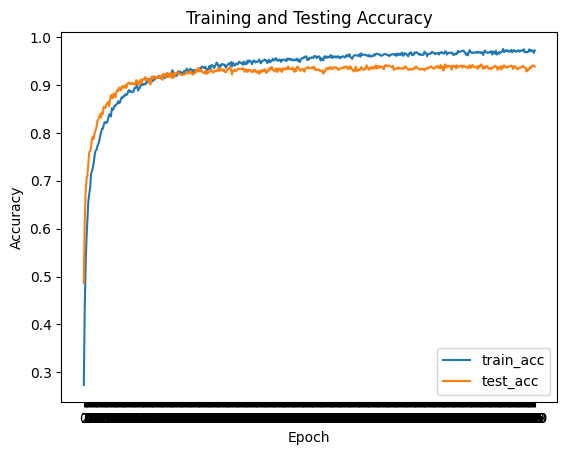

In [ ]:
plot_history(model2)

In [ ]:
from sklearn.metrics import classification_report

# predictions of testing data classifications
y_pred_prob = model2_func.predict(X_test)
y_pred = np.round(y_pred_prob)

# actual testing data labels
one_hot_y = np.zeros((y_test.to_numpy().size, y_test.to_numpy().max() + 1))
one_hot_y[np.arange(y_test.to_numpy().size), y_test.to_numpy()] = 1

# prints results by genres
print(classification_report(one_hot_y, y_pred))

63/63 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       196
           1       0.97      0.98      0.98       207
           2       0.90      0.91      0.91       181
           3       0.94      0.91      0.92       199
           4       0.96      0.95      0.95       211
           5       0.92      0.96      0.94       191
           6       0.97      0.97      0.97       203
           7       0.95      0.95      0.95       195
           8       0.94      0.88      0.91       214
           9       0.95      0.86      0.90       201

   micro avg       0.95      0.93      0.94      1998
   macro avg       0.95      0.93      0.94      1998
weighted avg       0.95      0.93      0.94      1998
 samples avg       0.93      0.93      0.93      1998



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


This resulted in a very slightly better model. The goal of this project is not necessarily to do whatever it takes to get the most accurate model, but rather to experiment and see how changes affect the training of the model.

In [ ]:
from xgboost import XGBClassifier

# XGB Classifier algorithm
XGBC=XGBClassifier(n_estimators = 300, learning_rate = 0.01).fit(X_train, y_train)

#Accuracy of XGB Classifier
XGBC.score(X_test, y_test)


0.7997997997997998

A quick XGB Classifier run resulted in a less accurate model.

Next we create another model, this one with only one hidden layer. I expect similar results, with a quicker training time.

In [ ]:
# one hidden layer

model3_func = tensorflow.keras.models.Sequential([    
    tensorflow.keras.layers.Dense(128,input_shape=(X_train.shape[1],),activation='relu'),
    tensorflow.keras.layers.Dropout(0.5),
    tensorflow.keras.layers.Dense(10,activation='softmax'),
])

print(model3_func.summary())



Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 128)               7424      
                                                                 
 dropout_31 (Dropout)        (None, 128)               0         
                                                                 
 dense_43 (Dense)            (None, 10)                1290      
                                                                 
Total params: 8,714
Trainable params: 8,714
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model3 = trainModel(model=model3_func, epochs=500, optimizer='adam') # with adam's default 0.001 learning rate

Epoch 1/500
250/250 [==============================] - 2s 5ms/step - loss: 1.6228 - accuracy: 0.4238 - val_loss: 1.1494 - val_accuracy: 0.6116
Epoch 2/500
250/250 [==============================] - 1s 4ms/step - loss: 1.1787 - accuracy: 0.5840 - val_loss: 0.9941 - val_accuracy: 0.6662
Epoch 3/500
250/250 [==============================] - 1s 5ms/step - loss: 1.0616 - accuracy: 0.6295 - val_loss: 0.9030 - val_accuracy: 0.7017
Epoch 4/500
250/250 [==============================] - 1s 5ms/step - loss: 0.9696 - accuracy: 0.6597 - val_loss: 0.8502 - val_accuracy: 0.7157
Epoch 5/500
250/250 [==============================] - 1s 4ms/step - loss: 0.9299 - accuracy: 0.6779 - val_loss: 0.8046 - val_accuracy: 0.7332
Epoch 6/500
250/250 [==============================] - 2s 9ms/step - loss: 0.8803 - accuracy: 0.6907 - val_loss: 0.7823 - val_accuracy: 0.7377
Epoch 7/500
250/250 [==============================] - 2s 7ms/step - loss: 0.8451 - accuracy: 0.7078 - val_loss: 0.7451 - val_accuracy: 0.7497

<Figure size 640x480 with 0 Axes>

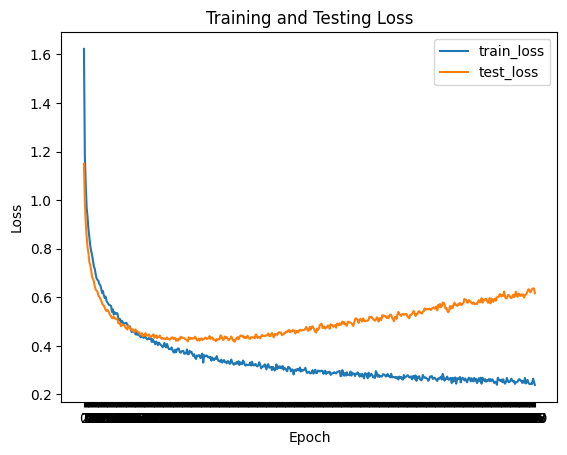

<Figure size 640x480 with 0 Axes>

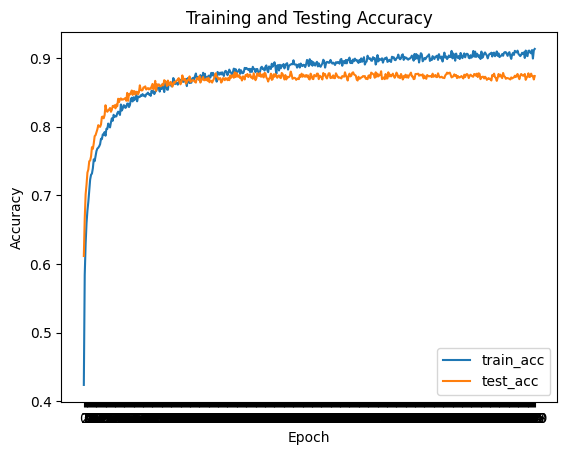

In [ ]:
plot_history(model3)

In [ ]:
# predictions of testing data classifications
y_pred_prob = model3_func.predict(X_test)
y_pred = np.round(y_pred_prob)

# actual testing data labels
one_hot_y = np.zeros((y_test.to_numpy().size, y_test.to_numpy().max() + 1))
one_hot_y[np.arange(y_test.to_numpy().size), y_test.to_numpy()] = 1

# prints results by genres
print(classification_report(one_hot_y, y_pred))

63/63 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       196
           1       0.93      0.97      0.95       207
           2       0.87      0.82      0.85       181
           3       0.86      0.77      0.81       199
           4       0.91      0.86      0.88       211
           5       0.87      0.91      0.89       191
           6       0.96      0.94      0.95       203
           7       0.87      0.89      0.88       195
           8       0.84      0.81      0.82       214
           9       0.81      0.80      0.81       201

   micro avg       0.88      0.87      0.87      1998
   macro avg       0.88      0.87      0.87      1998
weighted avg       0.88      0.87      0.87      1998
 samples avg       0.87      0.87      0.87      1998



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


This model was less effective than our previous, more complicated models. It learned some genres very effectively (jazz 1 and classical 6) while stuggling with others. 

Next, we will try a few other multi-class classification methods and compare results. 

In [ ]:
from sklearn.svm import SVC

svm = SVC().fit(X_train, y_train)

svm.score(X_test, y_test)


0.8593593593593594

In [ ]:
from sklearn.naive_bayes import GaussianNB

# GaussianNB algorithm
Gaussian=GaussianNB().fit(X_train, y_train)

# Accuracy of GaussianNB
Gaussian.score(X_test, y_test)


0.5115115115115115

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision tree classification algorithm
DecTree=DecisionTreeClassifier().fit(X_train, y_train)

# Accuracy of DecisionTreeClassifier
DecTree.score(X_test, y_test)

0.6561561561561562

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# k-Nearest Neighbors algorithm
KNN=KNeighborsClassifier().fit(X_train, y_train)

# Accuracy of KNN
KNN.score(X_test, y_test)

0.8803803803803804

k-Nearest Neighbors is the best preforming of these models, we will tweak it to see if we can make any improvements.

In [ ]:
# k-Nearest Neighbors algorithm: weight points by the inverse of their distance, rather than equally
KNN2=KNeighborsClassifier(weights='distance').fit(X_train, y_train)

# Accuracy of KNN
KNN2.score(X_test, y_test)

0.8963963963963963

In [ ]:
# k-Nearest Neighbors algorithm: Uses Manhatten distance rather than Euclidean distance
KNN3=KNeighborsClassifier(p=1).fit(X_train, y_train)

# Accuracy of KNN
KNN3.score(X_test, y_test)

0.9104104104104104

In [ ]:
# k-Nearest Neighbors algorithm: Uses Minkowski distance rather than Euclidean distance
KNN4=KNeighborsClassifier(p=3).fit(X_train, y_train)

# Accuracy of KNN
KNN4.score(X_test, y_test)

0.8528528528528528

Combining best preforming specs:

In [ ]:
# k-Nearest Neighbors algorithm: Uses Manhatten distance rather than Euclidean distance
KNN5=KNeighborsClassifier(p=1, weights='distance').fit(X_train, y_train)

# Accuracy of KNN
KNN5.score(X_test, y_test)

0.9204204204204204

In [ ]:
# k-Nearest Neighbors algorithm: Decreased number of neighbors
KNN6_func = KNeighborsClassifier(p=1, weights='distance', n_neighbors=2)
KNN6 = KNN6_func.fit(X_train, y_train)

# Accuracy of KNN
KNN6.score(X_test, y_test)

0.934934934934935

In [ ]:
# predictions of testing data classifications
y_pred_prob = KNN6.predict(X_test)
y_pred = np.round(y_pred_prob)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       196
           1       0.92      0.98      0.95       207
           2       0.84      0.90      0.87       181
           3       0.92      0.94      0.93       199
           4       0.98      0.93      0.96       211
           5       0.93      0.91      0.92       191
           6       0.99      0.98      0.99       203
           7       0.94      0.91      0.92       195
           8       0.94      0.94      0.94       214
           9       0.92      0.93      0.92       201

    accuracy                           0.93      1998
   macro avg       0.93      0.93      0.93      1998
weighted avg       0.94      0.93      0.94      1998



We end up with similar preformance to our best MLP model, with a much quicker training time. Interestingly, metal (2) continues to be the hardest genre to classify. 

One final experiment is this next model: model2_func, trained again, but using stochastic gradient descent instead of the adam optimizer.

In [ ]:
model2sgd = trainModel(model=model2_func, epochs=500, optimizer='sgd')

Epoch 1/500
250/250 [==============================] - 2s 5ms/step - loss: 2.3787 - accuracy: 0.1234 - val_loss: 2.1957 - val_accuracy: 0.3599
Epoch 2/500
250/250 [==============================] - 1s 4ms/step - loss: 2.2084 - accuracy: 0.1793 - val_loss: 2.0066 - val_accuracy: 0.3594
Epoch 3/500
250/250 [==============================] - 1s 4ms/step - loss: 2.0423 - accuracy: 0.2471 - val_loss: 1.7942 - val_accuracy: 0.3799
Epoch 4/500
250/250 [==============================] - 2s 7ms/step - loss: 1.9284 - accuracy: 0.2817 - val_loss: 1.6773 - val_accuracy: 0.4179
Epoch 5/500
250/250 [==============================] - 1s 5ms/step - loss: 1.8270 - accuracy: 0.3188 - val_loss: 1.6039 - val_accuracy: 0.4239
Epoch 6/500
250/250 [==============================] - 1s 4ms/step - loss: 1.7739 - accuracy: 0.3367 - val_loss: 1.5483 - val_accuracy: 0.4414
Epoch 7/500
250/250 [==============================] - 1s 4ms/step - loss: 1.7013 - accuracy: 0.3607 - val_loss: 1.4855 - val_accuracy: 0.4620

<Figure size 640x480 with 0 Axes>

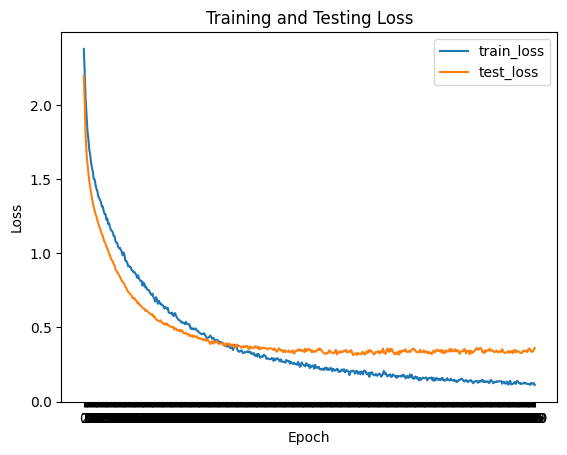

<Figure size 640x480 with 0 Axes>

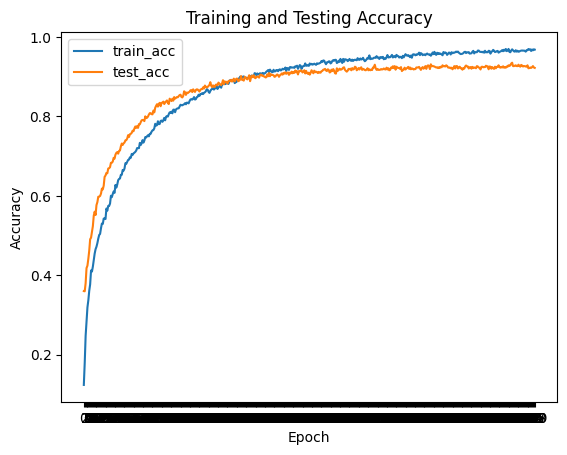

In [ ]:
plot_history(model2sgd)

Unsurprisingly, it gives very similar results.

Overall, I am satisfied with the results of this project. I was able to practice many key elements of machine learning, and create a model that accurately classifies songs into their respective genres. I got practice gathering, organizing, and manipulating the data. I also trained models both from packages, and created myself. I was also able to visualize the results of these models, and tweak them. 

I am curious how this would look on a larger dataset. If I were to continue this project, what I would first do is write code to take actual audio files (.wav or .mp3) and extract the features given in the features_3_sec.csv file used as the dataset. This would allow me to create a much larger dataset, and control the genres of the dataset. For example, I could create a dataset of only rock songs, and make the 'genres' each a different subgenre.

However, as stated in the beggining of this file, the project is less about creating a model with real-life implications, and more about me improving my practical understanding of machine learning. 